# Logistic Regression for Multiclass Classification

In this part, we consider logistic regression for K > 2 classes. 
We have data $(\mathbf{x}_i, y_i)$ for i = 1, 2, ..., N, where $\mathbf{x}_i\in\mathbb{R}^p$ is the input/feature and $y_i$ is the output/label, which indicates the class of the input.

We treat the output $y_i$ as a categorical variable, which indicates the class of the input.

## Model

We consider the augmented data $\mathbf{x}_i = [1, x_{i1}, x_{i2}, ..., x_{ip}]$ for i = 1, 2, ..., N, where $x_{ij}$ is the j-th feature of the i-th input, and we assume that the output $y_i$ can take K different values, 1, ..., K

We assume the the probability of the input $\mathbf{x}$ belonging to class 1 to K is given by a vector of probabilities.

$$
f(\mathbf{x}) = 
\begin{bmatrix}
f_1(\mathbf{x}) \\
f_2(\mathbf{x}) \\
\vdots \\
f_K(\mathbf{x})
\end{bmatrix}
=
\frac{1}{\sum_{k=1}^K \exp(\mathbf{w}_k^T\mathbf{x})}
\begin{bmatrix}
\exp(\mathbf{w}_1^T\mathbf{x}) \\
\exp(\mathbf{w}_2^T\mathbf{x}) \\
\vdots \\
\exp(\mathbf{w}_K^T\mathbf{x})
\end{bmatrix}
$$

- $\mathbf{w}_i = [w_{i0}, w_{i1}, w_{i2}, ..., w_{ip}]$ is the $p+1$ dimensional vector of coefficients for class $i$

- $\mathbf{w}_i^T \mathbf{x} = w_{i0} + w_{i1}x_1 + w_{i2}x_2 + ... + w_{ip}x_p$. As in linear regression and binary logistic regression, we are taking a linear combination of the features, and the cofficients are learned from the data.

- $f_j(\mathbf{x};\mathbf{W})$ is the probability of the input $\mathbf{x}$ belonging to class j.
By construction, $\sum_{j=1}^K f_j(\mathbf{x}; \mathbf{W}) = 1$ for all $\mathbf{x}$. That is, the probabilities of the input $\mathbf{x}$ belonging to class 1 to K sum to 1.

- $\mathbf{W}$ is the matrix of all the coefficients $\mathbf{w}_i$ for i = 1, 2, ..., K.

$$
\mathbf{W} =
\begin{bmatrix}
\mathbf{w}_1^T \\
\mathbf{w}_2^T \\
\vdots \\
\mathbf{w}_K^T
\end{bmatrix}
=
\begin{bmatrix}
w_{10} & w_{11} & \cdots & w_{1p} \\
w_{20} & w_{21} & \cdots & w_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
w_{K0} & w_{K1} & \cdots & w_{Kp}
\end{bmatrix}
$$

where $w_{ij}$ is the j-th coefficient for class i.

- We also write $f(\mathbf{x}; \mathbf{W})$ to indicate the dependence of the probabilities on the coefficients $\mathbf{W}$.



## Cross-entropy loss

Define the indicator variable $y_{ik}$ as

$$
y_{ik} = 
\begin{cases}
1 & \text{if } y_i \text{ is class k} \\
0 & \text{otherwise}
\end{cases}
$$

Another way to think about this is that we encode the categorical variable $y_{i}$ as a vector in $\mathbb{R}^K$ with a 1 at the k-th position and 0 elsewhere. For example, if there is 3 class and the output $y_i$ is class 2, then $y_i = [0, 1, 0]$.

The cross-entropy loss is given by

$$
L(\mathbf{W}) = -\sum_{i=1}^N \sum_{k=1}^K y_{ik}\log(f_k(\mathbf{x}_i; \mathbf{W}))
$$

The summation over $i$ is adding up the error from each sample. For the summation over $k$, we are adding up the error from each class. By our definition of $y_{ik}$, only the term corresponding to the true class $y_i$ contributes to the loss. For example, if there is 3 classes and $\mathbf{x}_1$ belong to class 2, then 

$$ - \sum_{k=1}^K y_{ik} \log(f_k(\mathbf{x}_i; \mathbf{W})) = -\log(f_2(\mathbf{x}_1; \mathbf{W}))$$

where $f_2(\mathbf{x}_1; \mathbf{W})$ is the predicted probability of $\mathbf{x}_1$ belonging to class 2. If it is close to 100%, then the loss contributed by sample 1 is close to 0. If $f_2(\mathbf{x}_1; \mathbf{W})$ is close to 0%, then the contributed loss is large.

The optimal weight matrix $\mathbf{W}$ is obtained by minimizing the loss function $L(\mathbf{W})$. 

**Exercises**: show that when K=2, this reduces to the binary logistic regression loss.

## Visualization

/Users/Ray/opt/anaconda3/envs/math10/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


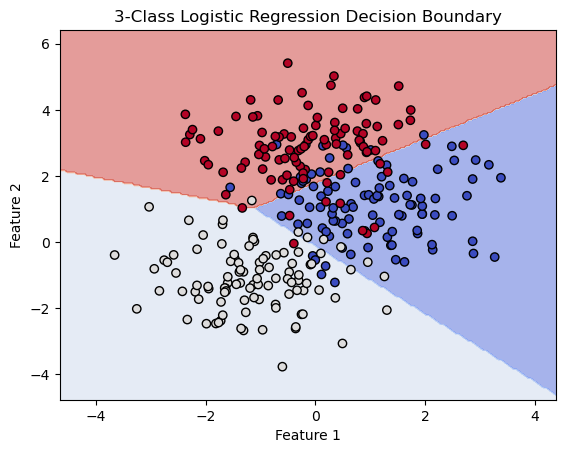

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples per class
N = 100

# Generate data for three classes, each class has a different mean
x_class1 = np.random.multivariate_normal([1, 1], np.eye(2), N)
x_class2 = np.random.multivariate_normal([-1, -1], np.eye(2), N)
x_class3 = np.random.multivariate_normal([0, 3], np.eye(2), N)

# Combine into a single dataset
X = np.vstack((x_class1, x_class2, x_class3))
y = np.concatenate((np.zeros(N), np.ones(N), 2*np.ones(N)))

# Create a logistic regression classifier with multinomial option for multi-class
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
clf.fit(X, y)

# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)
# Scatter plot of the data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

# Adding title and labels
ax.set_title('3-Class Logistic Regression Decision Boundary')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Show plot
plt.show()


## Classification using penguins dataset

Training accuracy: 0.96
Confusion Matrix:
 [[149   2   0]
 [  4  60   4]
 [  0   2 121]]


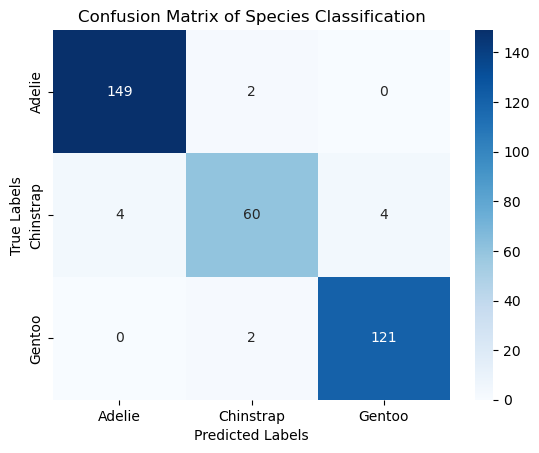

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
df.dropna(inplace=True)

features = ['bill_length_mm', 'bill_depth_mm']

# Select features
X = df[features]
y = df['species']


# Initialize and train the logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Calculate the training and test accuracy
score = clf.score(X, y)
print(f"Accuracy: {score:.2f}")


# Predict on the test set
y_pred = clf.predict(X)

# Evaluate the model
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Species Classification')
plt.show()


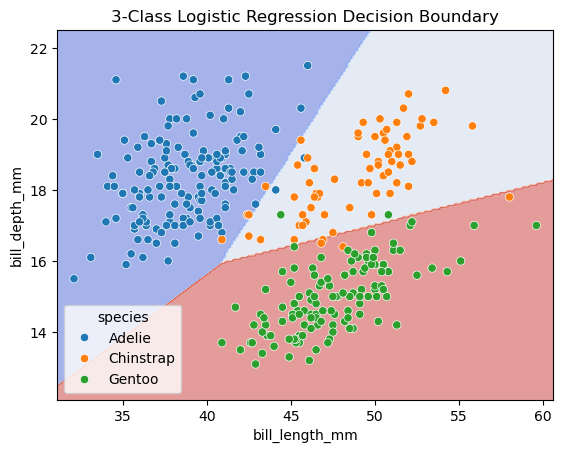

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)

# Scatter plot of the data points
scatter = sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')

# Adding title and labels
ax.set_title('3-Class Logistic Regression Decision Boundary')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])

# Show plot
plt.show()
